In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import matplotlib.pyplot as plt

In [4]:
def storeScores(dictionary, sequence, qualities):
    for n,c in enumerate(sequence):
        try:
            dictionary[n].append(qualities[n])
        except:
            dictionary[n] = []
            dictionary[n].append(qualities[n])
    return dictionary
        


In [5]:
IN_FILE = '../test_files/NA12878_child_1.fq'
#IN_FILE = '../test_files/smallTest.fq'

records = list(SeqIO.parse(IN_FILE, "fastq"))
totalseqs = len(records)
filename = IN_FILE
sequenceLength = len(records[0].seq)
numGC = 0
numtotal=0
numBadRead=0
qscores = {}
for record in records:
    qualities = record.letter_annotations["phred_quality"]
    qscores = storeScores(qscores, record.seq, qualities)
    s = str(record.seq)
    numGC += s.count('G') + s.count('C') 
    numtotal += len(s)
    if(sum(qualities)/len(qualities) < 5):
        numBadRead +=1
ratioGC = int(numGC/numtotal * 100)

df = pd.DataFrame(qscores)
print(filename,ratioGC, sequenceLength,totalseqs,numBadRead)

../test_files/NA12878_child_1.fq 34 101 52037 0


Text(0, 0.5, 'Number of Reads')

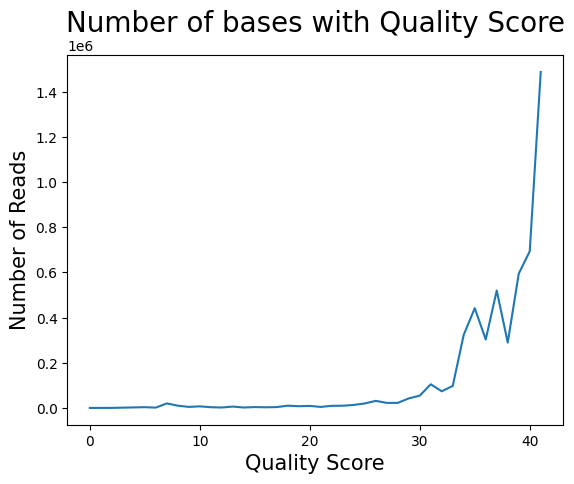

In [46]:
plt.rcdefaults()
df = pd.DataFrame(qscores)
df.tail()
valuecount = {0:0}
for reads in df.values:
    for baseval in reads:
        if(valuecount.get(baseval) == None):
            valuecount[baseval] = 1
        else:
            valuecount[baseval] = valuecount[baseval] + 1
valuedf = pd.DataFrame([valuecount])
valuedf = valuedf.reindex(sorted(valuedf.columns), axis=1)
valuedf
plt.plot(valuedf.columns, valuedf.iloc[0])
plt.title('Number of bases with Quality Score', fontsize=20)
plt.xlabel('Quality Score', fontsize=15)
plt.ylabel('Number of Bases', fontsize=15)

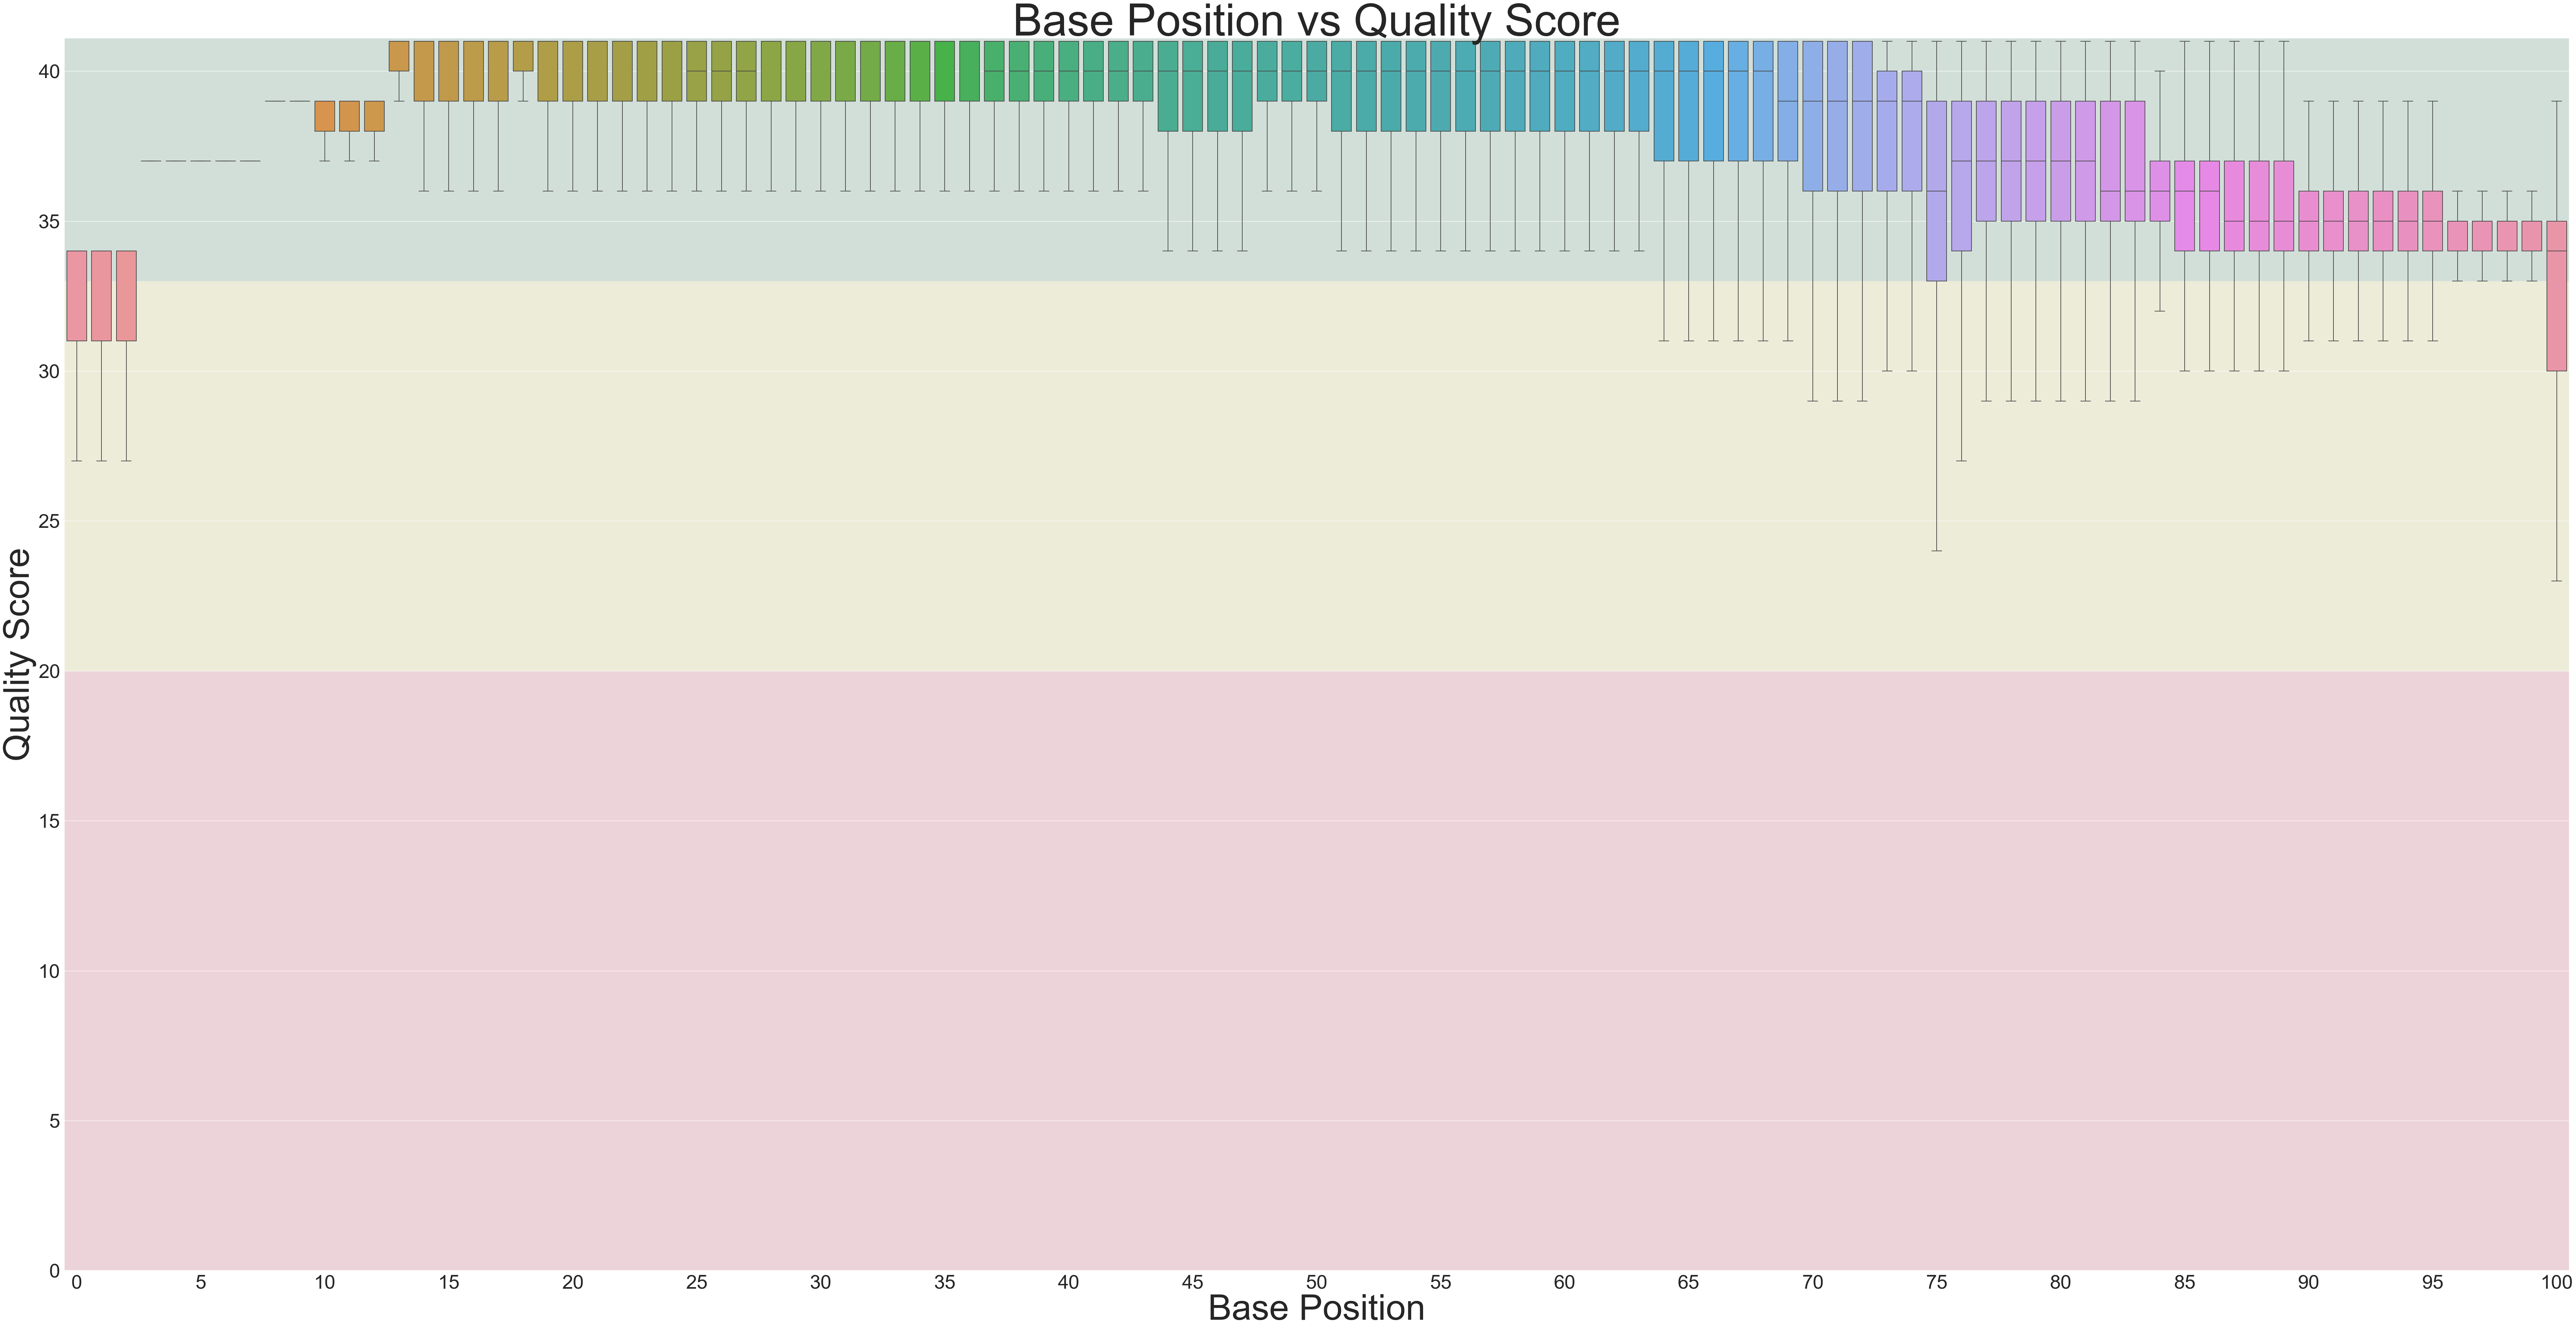

In [45]:
from PIL import Image
sns.set(font_scale = 4)


plt.figure(figsize=(101,50))
plt.axhspan(0,20, facecolor='red', alpha=.1, zorder = -1)
plt.axhspan(20,33, facecolor='yellow', alpha=.1, zorder = -1)
plt.axhspan(33,41.1, facecolor='green', alpha=.1, zorder = -1)
plot = sns.boxplot(data=df, showfliers = False)
plt.title('Base Position vs Quality Score', fontsize=100)
plt.xlabel('Base Position', fontsize=80)
plt.ylabel('Quality Score', fontsize=80)
plot.set_ylim(ymax=41.1,ymin=0)
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

